Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4668 - loss: 0.6915 - val_accuracy: 0.5312 - val_loss: 0.6831
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4351 - loss: 0.6956 - val_accuracy: 0.5625 - val_loss: 0.6787
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5172 - loss: 0.6792 - val_accuracy: 0.5625 - val_loss: 0.6738
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5775 - loss: 0.6665 - val_accuracy: 0.5625 - val_loss: 0.6689
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6028 - loss: 0.6656 - val_accuracy: 0.5625 - val_loss: 0.6641
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5673 - loss: 0.6655 - val_accuracy: 0.5625 - val_loss: 0.6596
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6013 - loss: 0.6570 - val_accuracy: 0.5938 - val_loss: 0.6551
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6396 - loss: 0.6562 - val_accuracy: 0.6250 - val_los

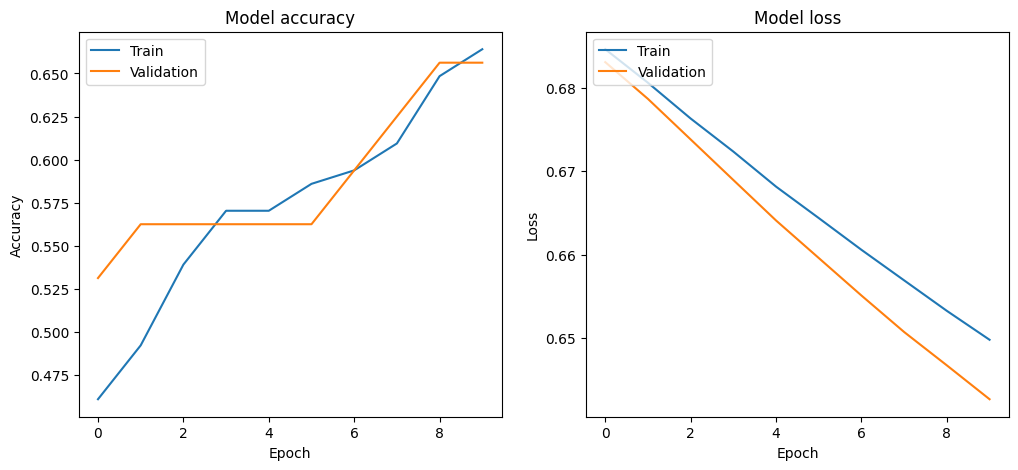

Input features
 1. website visit duration 
 2.number of pages visited
decision boundary in our neural network example serves as a visual tool to understand how the model differentiates between customers likely to make a purchase and those who are not, based on their website engagement metrics.
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


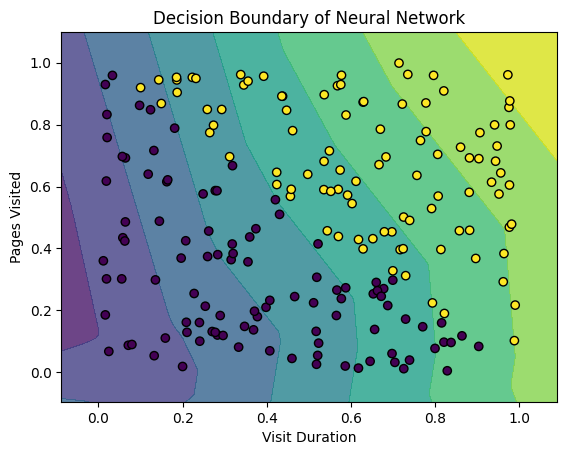

In [3]:
# Step 1: Generate Synthetic Data
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
# Two features: visit duration and pages visited
features = np.random.rand(data_size, 2)  
# Purchase (1) or not (0)
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels


# Step 2: Preprocess the Data
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

# Step 3: Build and Train the Neural Network
# Define the model
model = Sequential([
    # Input layer with 2 features
    Dense(10, activation='relu', input_shape=(2,)),  
    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')  
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# This reserves 20% of your training data for validation during training.
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)


# Step 4: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")



# Add Viz (nerve network training history visualization, blackbox)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

print("Input features\n 1. website visit duration \n 2.number of pages visited")
print("decision boundary in our neural network example serves as a visual tool to understand how the model differentiates between customers likely to make a purchase and those who are not, based on their website engagement metrics.")

# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()







